In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, plot_roc_curve, accuracy_score, roc_auc_score, confusion_matrix

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
# loading full dataset
#df = pd.read_csv("2021_Competition_Training.csv")

In [ ]:
#Creating the Humana_Small.csv dataset

#filename = "2021_Competition_Training.csv" 
#n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
#s = n//10  # sample size of 10%
#skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
#df = pd.read_csv(filename, skiprows=skip)


In [ ]:
#df.to_csv("Humana_Training_small.csv")

In [2]:
df = pd.read_csv("df_reduced.csv")
df.head()

C:\Users\patri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,8,11,13,15,18,24,26,27,28,30,50,53,57,59,61,70,80,96,117,127,151,163,169,181,198,199,200,204,208,221,234,241,246,266,276,284,285,288,299,310,319,320,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,ID,auth_3mth_post_acute_dia,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ip_snf_net_paid_pmpm_cost_9to12m_b4,auth_3mth_acute_ckd,...,auth_3mth_post_acute_end,auth_3mth_acute_mus,atlas_perpov_1980_0711,atlas_pct_laccess_white15,auth_3mth_post_acute_mean_los,rx_gpi2_66_pmpm_ct,auth_3mth_acute_gus,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4,atlas_low_education_2015_update,race_cd
0,0,0M9811Ocb1ST94LY3f5A9I00,0,0.00,0.618606,0.074862,88.272489,36.298252,0.0,0,...,0,0,0.0,33.795298,0.0,0.000000,0,Dec_1x-2x,0.0,1.0
1,1,McO36STd78Lc1cfYbb3aaeAI,0,0.00,7.792994,0.092192,87.500000,39.601099,NaN,0,...,0,0,0.0,21.427537,0.0,0.166667,0,New,0.0,1.0
2,2,aMO5Sfba593T616LYf382AI1,0,0.00,4.016513,0.096272,0.000000,26.716726,0.0,0,...,0,0,0.0,22.941176,0.0,0.000000,0,Dec_1x-2x,0.0,1.0
3,3,7e52M0O27b6STLY94AI8c0b0,0,5.57,5.203088,NaN,NaN,NaN,0.0,0,...,0,0,NaN,NaN,0.0,0.000000,0,No_Change,NaN,5.0
4,4,18cM8e1OS1T97LeY85dAaefI,0,0.00,4.621964,0.071283,0.000000,37.255197,0.0,0,...,0,0,0.0,0.844987,0.0,0.000000,0,Dec_1x-2x,0.0,1.0


In [3]:
df.set_index(["ID"], inplace = True)
df.head()

,Unnamed: 0,auth_3mth_post_acute_dia,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ip_snf_net_paid_pmpm_cost_9to12m_b4,auth_3mth_acute_ckd,bh_ncal_pmpm_ct,...,auth_3mth_post_acute_end,auth_3mth_acute_mus,atlas_perpov_1980_0711,atlas_pct_laccess_white15,auth_3mth_post_acute_mean_los,rx_gpi2_66_pmpm_ct,auth_3mth_acute_gus,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4,atlas_low_education_2015_update,race_cd
ID,,,,,,,,,,,,,,,,,,,,,
0M9811Ocb1ST94LY3f5A9I00,0,0,0.00,0.618606,0.074862,88.272489,36.298252,0.0,0,0.0,...,0,0,0.0,33.795298,0.0,0.000000,0,Dec_1x-2x,0.0,1.0
McO36STd78Lc1cfYbb3aaeAI,1,0,0.00,7.792994,0.092192,87.500000,39.601099,NaN,0,0.0,...,0,0,0.0,21.427537,0.0,0.166667,0,New,0.0,1.0
aMO5Sfba593T616LYf382AI1,2,0,0.00,4.016513,0.096272,0.000000,26.716726,0.0,0,0.0,...,0,0,0.0,22.941176,0.0,0.000000,0,Dec_1x-2x,0.0,1.0
7e52M0O27b6STLY94AI8c0b0,3,0,5.57,5.203088,NaN,NaN,NaN,0.0,0,0.0,...,0,0,NaN,NaN,0.0,0.000000,0,No_Change,NaN,5.0
18cM8e1OS1T97LeY85dAaefI,4,0,0.00,4.621964,0.071283,0.000000,37.255197,0.0,0,0.0,...,0,0,0.0,0.844987,0.0,0.000000,0,Dec_1x-2x,0.0,1.0


In [4]:
df = df.drop(["rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4", "Unnamed: 0"], axis = 1)

In [5]:
#dividing into features and labels
reduced = df.copy() 
x= reduced.loc[:, reduced.columns != 'covid_vaccination']
y = reduced['covid_vaccination']
y = ["1" if i == "vacc" else "0" for i in y]
print(y[:5])
print(reduced['covid_vaccination'][:5])

['0', '0', '1', '0', '0']
ID
0M9811Ocb1ST94LY3f5A9I00    no_vacc
McO36STd78Lc1cfYbb3aaeAI    no_vacc
aMO5Sfba593T616LYf382AI1       vacc
7e52M0O27b6STLY94AI8c0b0    no_vacc
18cM8e1OS1T97LeY85dAaefI    no_vacc
Name: covid_vaccination, dtype: object


In [9]:

x = pd.get_dummies(x)
x.shape


(97484, 1165)

In [8]:
x_no_dup = x.copy()
x_no_dup = x_no_dup.loc[:,~x_no_dup.columns.duplicated()]
x_no_dup.shape
x

(97484, 978)

In [10]:
#split into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(x_no_dup,y,test_size = 0.2, random_state = 42)
print(x_train.shape,x_test.shape)
print(y_test[0:5])

(77987, 978) (19497, 978)
['1', '0', '0', '0', '0']


In [11]:
xgbC = XGBClassifier()
scores = cross_val_score(xgbC,x_train, y_train)


C:\Users\patri\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:38:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patri\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patri\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patri\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patri\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [12]:
print(scores)

[0.82337479 0.82055392 0.82086299 0.82163237 0.82246586]


In [13]:
xbC=xgbC.fit(x_train, y_train) 


C:\Users\patri\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


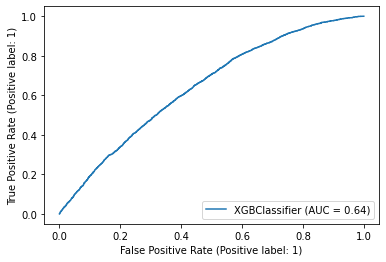

In [14]:
plot_roc_curve(xbC, x_test, y_test) 
plt.show()

[2.1634786e-03 2.0009857e-03 2.4789486e-03 2.4782477e-03 2.4650630e-03
 0.0000000e+00 1.6962348e-03 0.0000000e+00 2.4492298e-03 2.3823837e-03
 2.2260239e-03 2.5606097e-03 4.8091821e-03 2.6222349e-03 2.6451026e-03
 2.5508718e-03 2.5948912e-03 2.7158477e-03 3.2031182e-03 2.4478456e-03
 2.2946396e-03 0.0000000e+00 2.7631409e-03 4.3494841e-03 2.9010554e-03
 2.0907528e-03 0.0000000e+00 0.0000000e+00 2.6801601e-03 2.9111493e-03
 2.7341698e-03 2.7741466e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.6836086e-03 0.0000000e+00 2.3179948e-03 2.9235054e-03 0.0000000e+00
 7.9299351e-03 1.8036793e-03 0.0000000e+00 0.0000000e+00 2.4197185e-03
 2.4646816e-03 0.0000000e+00 1.9694818e-03 4.4886456e-03 0.0000000e+00
 2.9227610e-03 2.3440782e-03 1.0795770e-02 2.5918472e-03 2.6020540e-03
 2.6474388e-03 2.8929375e-03 3.9573447e-03 2.3412097e-03 0.0000000e+00
 2.9321169e-03 2.7209409e-03 2.2339453e-03 2.4119702e-03 3.1313775e-03
 2.5281410e-03 2.3577558e-03 2.4192277e-03 2.2580540e-03 0.0000000e+00
 3.144

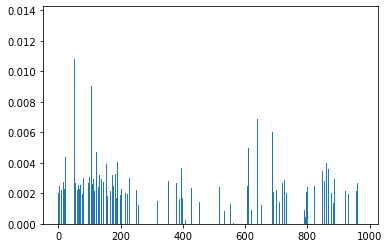

In [15]:
# feature importance
print(xbC.feature_importances_)
# plot
plt.bar(range(len(xbC.feature_importances_)), xbC.feature_importances_)
plt.show()

In [16]:
imp_dict = {}
for i in range(x_no_dup.shape[1]):
    name = x_no_dup.columns[i]
    imp = xbC.feature_importances_[i]
    imp_dict[i]=name,imp
    
imp_df = pd.DataFrame(imp_dict)
imp_df = imp_df.T
imp_df = imp_df.rename(columns = {0:"Feature_name", 1: "Importance"})
imp_df.head()

,Feature_name,Importance
0,rx_gpi2_72_pmpm_cost_6to9m_b4,0.002163
1,atlas_pct_laccess_child15,0.002001
2,atlas_recfacpth14,0.002479
3,atlas_pct_fmrkt_frveg16,0.002478
4,atlas_pct_free_lunch14,0.002465


In [25]:
imp_df.sort_values(by = "Importance", ascending = False).head()


,Feature_name,Importance
114,cms_orig_reas_entitle_cd,0.013584
639,hum_region_EAST CENTRAL,0.01165
52,est_age,0.010796
107,atlas_foodinsec_child_03_11,0.00902
40,atlas_pct_wic15,0.00793


In [18]:
imp_df["Importance"].median()

0.0

In [23]:
imp_df["Importance"].quantile(q=0.95, interpolation='linear')

0.0033879703143611544

In [29]:
#Choose all predictors except target & IDcols

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb1_model = xgb1.fit(x_train, y_train, eval_metric='auc')


C:\Users\patri\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 0.8241


C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


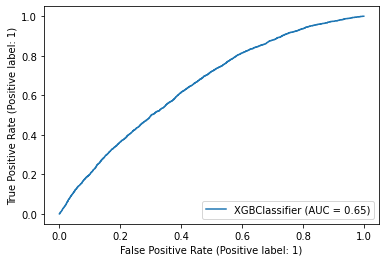

In [34]:
pred = xgb1_model.predict(x_test)
predprob = xgb1_model.predict_proba(x_test)
        

print ("\nModel Report")
print ("Accuracy : %.4g" % accuracy_score(y_test, pred))
plot_roc_curve(xgb1_model, x_test, y_test)
plt.show()
                    


C:\Users\patri\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 0.8273


C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


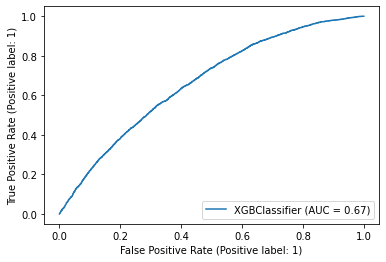

In [35]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=300,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb2_model = xgb2.fit(x_train, y_train, eval_metric='auc')

pred = xgb2_model.predict(x_test)
predprob = xgb2_model.predict_proba(x_test)
        

print ("\nModel Report")
print ("Accuracy : %.4g" % accuracy_score(y_test, pred))
plot_roc_curve(xgb2_model, x_test, y_test)
plt.show()


In [42]:
imp_dict = {}
for i in range(x_no_dup.shape[1]):
    name = x_no_dup.columns[i]
    imp = xgb2_model.feature_importances_[i]
    imp_dict[i]=name,imp
    
imp_df = pd.DataFrame(imp_dict)
imp_df = imp_df.T
imp_df = imp_df.rename(columns = {0:"Feature_name", 1: "Importance"})
imp_df.head()

,Feature_name,Importance
0,rx_gpi2_72_pmpm_cost_6to9m_b4,0.001943
1,atlas_pct_laccess_child15,0.001931
2,atlas_recfacpth14,0.002252
3,atlas_pct_fmrkt_frveg16,0.001713
4,atlas_pct_free_lunch14,0.002128


In [43]:
imp_df.sort_values(by="Importance", ascending = False)

,Feature_name,Importance
114,cms_orig_reas_entitle_cd,0.010129
52,est_age,0.008852
639,hum_region_EAST CENTRAL,0.007743
640,hum_region_FLORIDA,0.006716
700,rx_gpi2_39_pmpm_cost_t_6-3-0m_b4_No Activity,0.006362
...,...,...
479,rx_gpi2_34_dist_gpi6_pmpm_ct_1.0,0.0
480,rx_gpi2_34_dist_gpi6_pmpm_ct_*,0.0
483,rx_maint_pmpm_cost_t_6-3-0m_b4_Dec_4x-8x,0.0
488,rx_maint_pmpm_cost_t_6-3-0m_b4_Inc_over_8x,0.0


In [44]:
imp_df.to_csv("Features_Importance.csv")

In [45]:
val_df = pd.read_csv("2021_Competition_Holdout.csv")
val_df.head()

C:\Users\patri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,8,9,11,13,16,20,26,28,29,31,33,51,55,58,62,64,66,75,82,85,102,124,131,132,135,159,173,179,191,208,209,210,219,233,239,246,254,260,284,287,292,296,304,305,307,308,322,333,343,344,349,351,352,354) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,ID,auth_3mth_post_acute_dia,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ip_snf_net_paid_pmpm_cost_9to12m_b4,auth_3mth_acute_ckd,...,auth_3mth_post_acute_end,auth_3mth_acute_mus,atlas_perpov_1980_0711,atlas_pct_laccess_white15,auth_3mth_post_acute_mean_los,rx_gpi2_66_pmpm_ct,auth_3mth_acute_gus,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4,atlas_low_education_2015_update,race_cd
0,0,5M9OS1T3dLc09Ybc7013AI9f,0,0.0,9.735346,0.131562,100.0,NaN,0.0,0,...,0,0,0.0,12.404716,0.0,0.333333,0,Dec_1x-2x,0.0,1.0
1,1,0M8f45b4a4Of6aS3TL6Ya9AI,0,0.0,6.264524,0.075427,75.0,23.833889,0.0,0,...,0,0,0.0,35.363608,0.0,0.000000,0,No Activity,0.0,1.0
2,2,12MOS912Tb204LYacA2fIc22,0,0.0,6.136065,0.106704,85.0,26.085757,0.0,0,...,0,0,0.0,37.241558,0.0,0.000000,0,No_Change,0.0,1.0
3,3,M6O69S24T36LYec4AI5d0b56,0,0.0,1.244630,0.000000,NaN,64.748171,0.0,0,...,0,0,0.0,3.726617,0.0,0.000000,0,Inc_1x-2x,0.0,1.0
4,4,45947aM37Oc8S3dTLYA00Ica,0,0.0,8.009543,0.061276,87.5,61.518384,0.0,0,...,0,0,0.0,12.177458,0.0,0.000000,0,Dec_1x-2x,0.0,1.0


In [47]:
val_df = val_df.set_index("ID").drop("Unnamed: 0", axis = 1)

C:\Users\patri\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 0.8279


C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


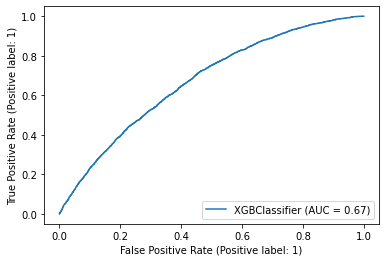

In [51]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=300,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb3_model = xgb3.fit(x_train, y_train, eval_metric='auc')

pred = xgb3_model.predict(x_test)
predprob = xgb3_model.predict_proba(x_test)
        

print ("\nModel Report")
print ("Accuracy : %.4g" % accuracy_score(y_test, pred))
plot_roc_curve(xgb3_model, x_test, y_test)
plt.show()

In [53]:
x_val = val_df.copy()

x_val = pd.get_dummies(x_val)

In [54]:
val_pred = xgb3_model.predict(x_val)

ValueError: Feature shape mismatch, expected: 978, got 525158